In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
store_data=pd.read_csv("Global_Superstore2.csv",encoding="ISO-8859-1")
print(store_data)

       Row ID         Order ID  Order Date   Ship Date       Ship Mode  \
0       32298   CA-2012-124891  31-07-2012  31-07-2012        Same Day   
1       26341    IN-2013-77878  05-02-2013  07-02-2013    Second Class   
2       25330    IN-2013-71249  17-10-2013  18-10-2013     First Class   
3       13524  ES-2013-1579342  28-01-2013  30-01-2013     First Class   
4       47221     SG-2013-4320  05-11-2013  06-11-2013        Same Day   
...       ...              ...         ...         ...             ...   
51285   29002    IN-2014-62366  19-06-2014  19-06-2014        Same Day   
51286   35398   US-2014-102288  20-06-2014  24-06-2014  Standard Class   
51287   40470   US-2013-155768  02-12-2013  02-12-2013        Same Day   
51288    9596   MX-2012-140767  18-02-2012  22-02-2012  Standard Class   
51289    6147   MX-2012-134460  22-05-2012  26-05-2012    Second Class   

      Customer ID     Customer Name      Segment           City  \
0        RH-19495       Rick Hansen     Cons

In [5]:
store_data.value_counts("Order ID").sum()

np.int64(51290)

In [11]:
store_data.value_counts("Country")

Country
United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
Eritrea             2
Burundi             2
Chad                2
South Sudan         2
Swaziland           2
Name: count, Length: 147, dtype: int64

In [8]:
store_data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,19-06-2014,19-06-2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,35398,US-2014-102288,20-06-2014,24-06-2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,40470,US-2013-155768,02-12-2013,02-12-2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,9596,MX-2012-140767,18-02-2012,22-02-2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium


In [9]:
print(f"Total Sales: {store_data["Sales"].sum()}")

Total Sales: 12642501.90988


In [10]:
print(f"Total Profit: {store_data["Profit"].sum()}")

Total Profit: 1467457.29128


In [14]:
orderwise_cities=store_data.value_counts("City").reset_index(name="Total Orders")
orderwise_cities.sort_values(by="Total Orders",ascending=False).head(5)

,City,Total Orders
0,New York City,915
1,Los Angeles,747
2,Philadelphia,537
3,San Francisco,510
4,Santo Domingo,443


In [25]:
segmentwise_profit=store_data.groupby("Segment")["Profit"].mean().reset_index(name="Avg Profit")
highest_profit_segment=segmentwise_profit.sort_values(by="Avg Profit",ascending=False)
highest_profit_segment

,Segment,Avg Profit
2,Home Office,29.648847
1,Corporate,28.596042
0,Consumer,28.254008


In [26]:
print(f"Segment with highest profit: {highest_profit_segment["Segment"].head(1)}")

Segment with highest profit: 2    Home Office
Name: Segment, dtype: object


In [27]:
store_data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,19-06-2014,19-06-2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,35398,US-2014-102288,20-06-2014,24-06-2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,40470,US-2013-155768,02-12-2013,02-12-2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,9596,MX-2012-140767,18-02-2012,22-02-2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium


In [29]:
store_data["Order Date"]=pd.to_datetime(store_data["Order Date"])
store_data["Ship Date"]=pd.to_datetime(store_data["Ship Date"])
store_data

C:\Users\User\AppData\Local\Temp\ipykernel_8596\2131868236.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  store_data["Ship Date"]=pd.to_datetime(store_data["Ship Date"])


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium


In [31]:
max_orderdate=store_data["Order Date"].max()
min_orderdate=store_data["Order Date"].min()
print(f"Range of order dates: {max_orderdate} to {min_orderdate}")

Range of order dates: 2014-12-31 00:00:00 to 2011-01-01 00:00:00


In [32]:
store_data["Month"]=store_data["Ship Date"].dt.month_name()
store_data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Month
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,July
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,February
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,October
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,January
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium,June
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium,June
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High,December
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium,February


In [34]:
monthly_sales=store_data.groupby("Month")["Sales"].sum().reset_index(name="Total Sales")
print(monthly_sales)

        Month   Total Sales
0       April  6.989874e+05
1      August  1.211147e+06
2    December  1.604565e+06
3    February  5.591082e+05
4     January  7.736913e+05
5        July  8.327690e+05
6        June  1.253714e+06
7       March  7.609436e+05
8         May  8.353520e+05
9    November  1.467580e+06
10    October  1.207492e+06
11  September  1.437152e+06


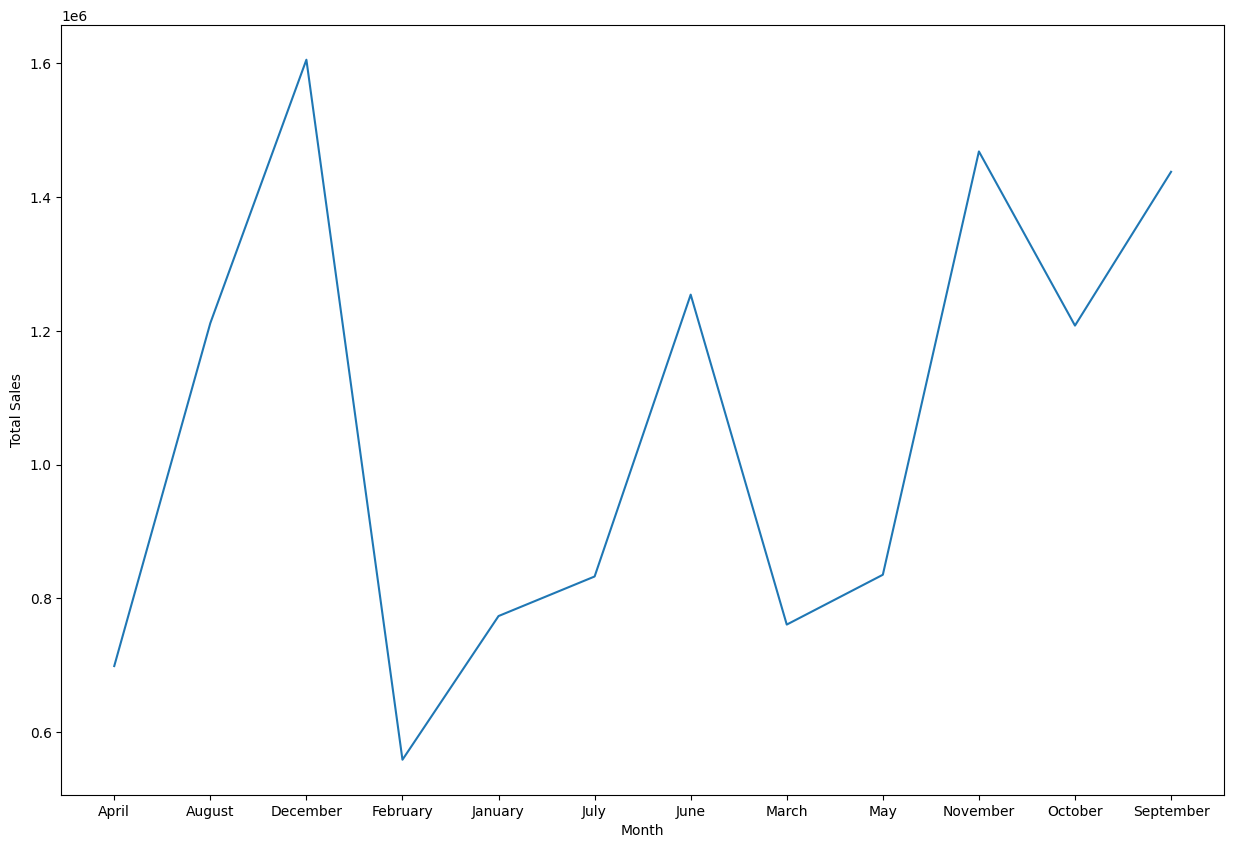

In [35]:
plt.figure(figsize=(15,10))
sns.lineplot(monthly_sales,x="Month",y="Total Sales")
plt.show()

In [45]:
monthwise_orders=store_data.value_counts("Month").reset_index(name="Orders").sort_values(by="Orders",ascending=False)
monthwise_orders

,Month,Orders
0,December,6316
1,November,6148
2,September,5887
3,June,5175
4,August,4838
5,October,4580
6,May,3592
7,July,3469
8,April,3071
9,January,3035


In [46]:
print(f"Month with highest order: {monthwise_orders["Month"].head(1)}")

Month with highest order: 0    December
Name: Month, dtype: object


In [47]:
store_data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Month
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,July
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,February
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,October
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,January
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium,June
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium,June
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High,December
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium,February


In [51]:
categorywise_profit=store_data.groupby("Category")["Profit"].sum().reset_index(name="Total Profit").sort_values(by="Total Profit",ascending=False)
categorywise_profit

,Category,Total Profit
2,Technology,663778.73318
1,Office Supplies,518473.83430
0,Furniture,285204.72380


In [52]:
print(f"Category with highest profit: {categorywise_profit["Category"].head(1)}")

Category with highest profit: 2    Technology
Name: Category, dtype: object


In [56]:
quantity_subcategory=store_data.groupby("Sub-Category")["Quantity"].sum().reset_index(name="Total Quantities").sort_values(by="Total Quantities",ascending=False)
quantity_subcategory.head(10)

,Sub-Category,Total Quantities
3,Binders,21429
14,Storage,16917
2,Art,16301
12,Paper,12822
5,Chairs,12336
13,Phones,11870
9,Furnishings,11225
0,Accessories,10946
10,Labels,9322
15,Supplies,8543


In [58]:
individual_profit=store_data[["Product Name","Profit"]].sort_values(by="Profit",ascending=False)
individual_profit

,Product Name,Profit
329,Canon imageCLASS 2200 Advanced Copier,8399.9760
14843,Canon imageCLASS 2200 Advanced Copier,6719.9808
290,Canon imageCLASS 2200 Advanced Copier,5039.9856
122,GBC Ibimaster 500 Manual ProClick Binding System,4946.3700
45,Ibico EPK-21 Electric Binding System,4630.4755
...,...,...
2347,Lexmark MX611dhe Monochrome Laser Printer,-3399.9800
1341,GBC DocuBind P400 Electric Binding System,-3701.8928
37,Cubify CubeX 3D Printer Triple Head Print,-3839.9904
6591,"Motorola Smart Phone, Cordless",-4088.3760


In [60]:
print(f"Product with highest individual profit: {individual_profit["Product Name"].head(1)}")

Product with highest individual profit: 329    Canon imageCLASS 2200 Advanced Copier
Name: Product Name, dtype: object


In [61]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [62]:
sales_per_market=store_data.groupby("Market")["Sales"].sum()
sales_per_market

Market
APAC      3.585744e+06
Africa    7.837732e+05
Canada    6.692817e+04
EMEA      8.061613e+05
EU        2.938089e+06
LATAM     2.164605e+06
US        2.297201e+06
Name: Sales, dtype: float64

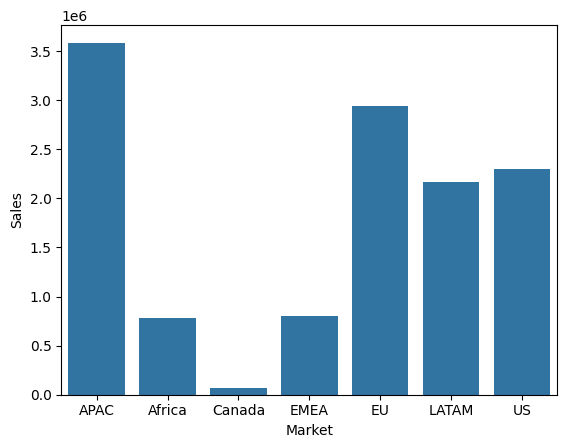

In [63]:
sns.barplot(sales_per_market)
plt.show()

In [64]:
profit_per_market=store_data.groupby("Market")["Profit"].sum()
profit_per_market

Market
APAC      436000.04900
Africa     88871.63100
Canada     17817.39000
EMEA       43897.97100
EU        372829.74150
LATAM     221643.48708
US        286397.02170
Name: Profit, dtype: float64

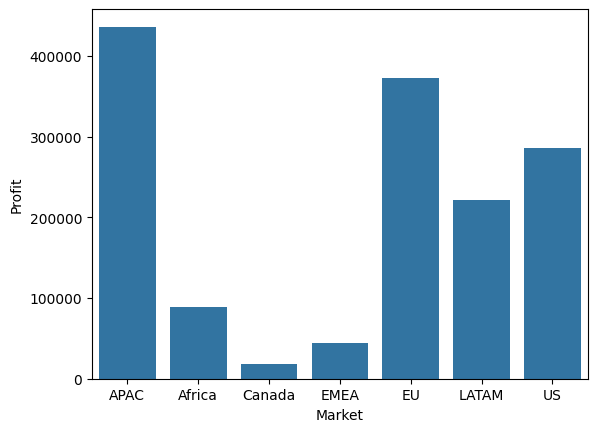

In [65]:
sns.barplot(profit_per_market)
plt.show()

In [69]:
avg_discount_cat_seg=store_data.groupby(["Segment","Category"])["Discount"].mean().reset_index(name="Average Discount")
avg_discount_cat_seg

,Segment,Category,Average Discount
0,Consumer,Furniture,0.169429
1,Consumer,Office Supplies,0.137843
2,Consumer,Technology,0.136285
3,Corporate,Furniture,0.168129
4,Corporate,Office Supplies,0.136891
5,Corporate,Technology,0.136576
6,Home Office,Furniture,0.164148
7,Home Office,Office Supplies,0.137032
8,Home Office,Technology,0.130540


In [76]:
corr=avg_discount_cat_seg.pivot_table(columns="Category",index="Segment",values="Average Discount").corr()

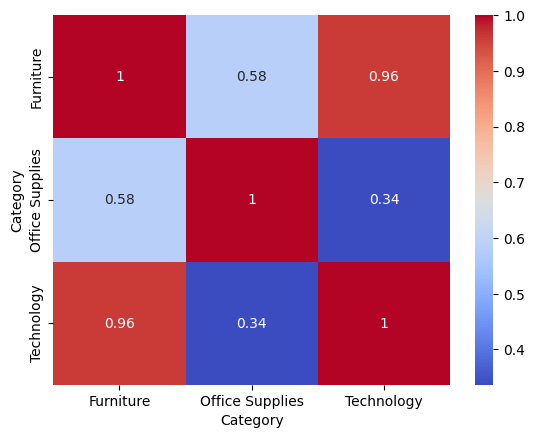

In [77]:
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()